##### ПИ18-1 Гриднев Д.В.

In [1]:
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [2]:
# Как боги отрубаем SSL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


faces = fetch_olivetti_faces()
images = faces.data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images, faces.target,
                                                    test_size=0.2,
                                                    random_state=True)

In [4]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [5]:
predict = clf.predict(X_test)
print(f"{metrics.accuracy_score(y_test, predict)=}\n"
      f"{metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=}\n"
      f"{metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=}")

metrics.accuracy_score(y_test, predict)=0.8375
metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=0.8120833333333334
metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=0.8375


In [6]:
trainings, tests, size = [], [], np.linspace(0.6, 0.1, num=10)

for test_size in np.linspace(0.6, 0.1, num=10):
    X_train, X_test, y_train, y_test = train_test_split(images,
                                                        faces.target,
                                                        test_size=test_size,
                                                        random_state=True)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    trainings.append(clf.score(X_train, y_train))
    tests.append(clf.score(X_test, y_test))

Text(0, 0.5, 'Точность')

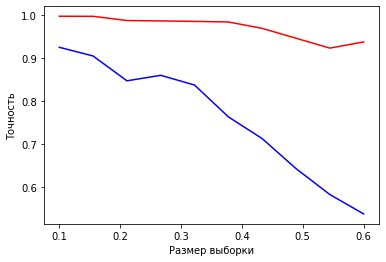

In [7]:
fig, ax = plt.subplots()
ax.plot(size, trainings, "r")
ax.plot(size, tests, "b")
ax.set_xlabel("Размер выборки")
ax.set_ylabel("Точность")

# Другие модели

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    faces.target,
                                                    test_size=0.2,
                                                    random_state=True)

models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ("NB", GaussianNB()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("DT", DecisionTreeClassifier()),
    ("SVM_linear", svm.SVC(kernel='linear')),
    ("SVM_rbf", svm.SVC(kernel='rbf'))
]

for name, model in models:
    model.fit(X_train, y_train)

    predict = model.predict(X_test)


    print(
        f"{name}: \n{metrics.accuracy_score(y_test, predict)=}\n"
        f"{metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=}\n"
        f"{metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=}\n\n"
    )


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 
metrics.accuracy_score(y_test, predict)=0.975
metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=0.978125
metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=0.975


LDA: 
metrics.accuracy_score(y_test, predict)=0.975
metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=0.9729166666666667
metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=0.975


NB: 
metrics.accuracy_score(y_test, predict)=0.8625
metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=0.8797916666666665
metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=0.8625


KNN: 
metrics.accuracy_score(y_test, predict)=0.8125
metrics.precision_score(y_test, predict, average='weighted', zero_division=0)=0.8608630952380952
metrics.recall_score(y_test, predict,average='weighted', zero_division=0)=0.8125


DT: 
metrics.accuracy_score(y_test, predict)=0.5625
metrics.precision_score(y_test, 

In [9]:

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
preds = clf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds,)
roc_auc = metrics.auc(fpr, tpr)

ValueError: multiclass format is not supported

In [ ]:
plt.plot(fpr, tpr, 'r')